In [13]:
# Data wrangling
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import matplotlib.dates as mdates

In [14]:
df2005 = pd.read_csv("../data/forModels/clean_data_2005.csv", sep = ',')
df2005.index = pd.to_datetime(df2005.Date, format="%d.%m.%Y")
df2005 = df2005.drop(['Date'], axis=1)

df2006 = pd.read_csv("../data/forModels/clean_data_2006.csv", sep = ',')
df2006.index = pd.to_datetime(df2006.Date, format="%d.%m.%Y")
df2006 = df2006.drop(['Date'], axis=1)

print(f'Shape of data 2005: {df2005.shape}')
print(f'Shape of data 2006: {df2006.shape}')

df = pd.concat([df2005, df2006], axis=0)
# df = df.fillna(0)

Shape of data 2005: (165, 5)
Shape of data 2006: (165, 5)


In [40]:
df

,Date,Avg,DD,DDSum,Rain,Sum_trap
0,2005-05-01,12.93,2.93,32.13,0.0,0.0
1,2005-05-02,15.07,5.07,37.21,0.0,0.0
2,2005-05-03,16.30,6.30,43.51,3.0,0.0
3,2005-05-04,13.23,3.23,46.74,6.1,0.0
4,2005-05-05,9.33,0.00,46.74,23.0,0.0
...,...,...,...,...,...,...
325,2006-10-08,11.54,1.54,1149.50,0.0,0.0
326,2006-10-09,11.44,1.44,1150.94,0.0,0.0
327,2006-10-10,10.61,0.61,1151.55,0.0,0.0
328,2006-10-11,10.82,0.82,1152.37,0.0,0.0


In [19]:
df = df.reset_index()

In [22]:
def plot_data(df):
#     x_values = [datetime.datetime.strptime(d,"%d.%m.%Y").date() for d in df['Date']]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.plot(df['Date'],df['Sum_trap'])
    plt.gcf().autofmt_xdate()
    plt.xlabel("Data")
    plt.ylabel("Liczba motyli")
    plt.show()

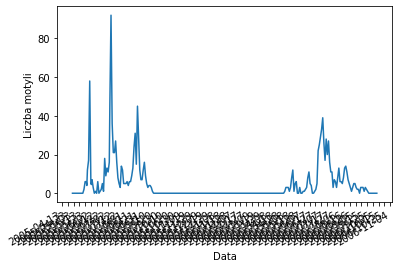

In [23]:
plot_data(df)

In [28]:
x = df.drop(['Date','DD','Sum_trap'], axis=1)
y = df['Sum_trap']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## LinerRegression

In [32]:
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred_slr= slr.predict(x_test)

In [34]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head()

,Actual value,Predicted value
122,9.5,8.263345
66,69.0,13.018723
142,0.0,0.633046
246,21.5,16.370901
146,0.0,2.325660


In [20]:
x_test.shape

(99, 4)

In [35]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 23.55
Mean Absolute Error: 6.458037948561373
Mean Square Error: 120.95919641457625
Root Mean Square Error: 10.998145135184217


In [ ]:
plt.plot(df['Date'],df['Sum_trap'])

## LogisticRegression

In [31]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

In [32]:
logreg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

## SVM

In [36]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(x_train, y_train)

SVR(kernel='poly')

In [37]:
y_pred_svm = regressor.predict(x_test)

In [38]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svm})
slr_diff.head()

,Actual value,Predicted value
122,9.5,4.182262
66,69.0,5.419456
142,0.0,3.354621
246,21.5,4.933563
146,0.0,3.340522


In [39]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_svm)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_svm)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -4.97
Mean Absolute Error: 7.275435592132738
Mean Square Error: 181.02975868325214
Root Mean Square Error: 13.454729974371546
